In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

The sample dataset 'wine' contains various chemical properties of wine samples, along with additional attributes related to the wine's quality and type. Some of the possible analyses: predicting wine quality based on chemical properties, understanding the factors that influence wine quality, and differentiating between red and white wines based on their chemical compositions.

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Mark about 70% of the data for training and use the rest for testing
# Outcome variable: high_quality
# Predictors: density, sulphates, pH
X_train, X_test, y_train, y_test = train_test_split(df[['density','sulphates','pH']], df['high_quality'], test_size=0.3)

In [5]:
X_train.head()

,density,sulphates,pH
2508,0.99850,0.53,3.08
6071,0.99173,0.65,3.18
827,0.99624,0.49,3.36
4280,0.99772,0.59,2.99
1203,0.99878,0.55,3.14


In [6]:
# Define the classifier using kNN function and train it
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Test the classifier by giving it test instances
prediction = classifier.predict(X_test)

In [8]:
# Count how many were correctly classified
correct = np.where(prediction==y_test, 1, 0).sum()
print(correct)

1539


In [9]:
accuracy = correct/len(y_test)
print(accuracy)

0.7892307692307692


If K = 3, our accuracy on the test set is 78.92%. Now we will vary K between 1 to 50 and select only odd values of K so that the algorithm is conveniently able to assign a category and ties never arise.

In [10]:
results = []

for k in range(1, 51, 2):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train,y_train)
  prediction = classifier.predict(X_test)
  correct = np.where(prediction==y_test, 1, 0).sum()
  accuracy = correct/len(y_test)
  print ("k=", k, " Accuracy=", accuracy)
  results.append([k,accuracy])

# Convert that series of tuples in a dataframe for easy plotting
results = pd.DataFrame(results, columns=["k","accuracy"])

k= 1  Accuracy= 0.8056410256410257
k= 3  Accuracy= 0.7892307692307692
k= 5  Accuracy= 0.7882051282051282
k= 7  Accuracy= 0.7861538461538462
k= 9  Accuracy= 0.7953846153846154
k= 11  Accuracy= 0.7974358974358975
k= 13  Accuracy= 0.7958974358974359
k= 15  Accuracy= 0.796923076923077
k= 17  Accuracy= 0.7974358974358975
k= 19  Accuracy= 0.8025641025641026
k= 21  Accuracy= 0.7984615384615384
k= 23  Accuracy= 0.8
k= 25  Accuracy= 0.7979487179487179
k= 27  Accuracy= 0.801025641025641
k= 29  Accuracy= 0.801025641025641
k= 31  Accuracy= 0.8015384615384615
k= 33  Accuracy= 0.8020512820512821
k= 35  Accuracy= 0.8025641025641026
k= 37  Accuracy= 0.8020512820512821
k= 39  Accuracy= 0.8005128205128205
k= 41  Accuracy= 0.801025641025641
k= 43  Accuracy= 0.8025641025641026
k= 45  Accuracy= 0.8020512820512821
k= 47  Accuracy= 0.8020512820512821
k= 49  Accuracy= 0.803076923076923


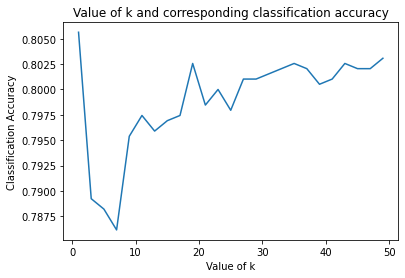

In [12]:
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.xlabel("Value of k")
plt.ylabel("Classification Accuracy")
plt.show()

Insights: There is a sharp drop in accuracy when k increases from 1 to around 3 or 5. After this initial drop, the accuracy starts to recover and fluctuates, showing some instability for small k values. The overall trend shows that the classification accuracy improves as k increases, but with diminishing returns. This means that after a certain point, increasing k does not significantly enhance the accuracy and might even slightly decrease it due to over-smoothing. We recommend choosing a k value where the accuracy is relatively stable and high (range of 20 to 50 seems promising).